# Лабораторная работа №4: Частотный анализ формул численного интегрирования

Выполнили: студент гр. 1384 Бобков Владислав, студентка гр. 1384 Усачева Дарья. Бригада № 7.

## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования.

## Основные теоретические положения

- Формула прямоугольников:

$$y_{n + 1} = y_n + s_{n + \frac{1}{2}}, y_0 = 0$$

- Формула трапеций:

$$y_{n + 1} = y_n + \frac{1}{2}(s_n + s_{n+1}), y_0 = 0$$

- Формула Симпсона:

$$y_{n + 1} = y_{n - 1} + \frac{1}{3}(s_{n - 1} + 4s_n + s_{n + 1}), y_0 = 0$$

- Формула интегрирования «по правилу 3/8»:

$$y_{n + 2} = y_{n - 1} + \frac{1}{8}(x_{n+2} + 3x_{n + 1} + 3x_n + x_{n-1})$$ 

- Формула Эйлера:

$$e^{ix} = \cos(x) + i \sin(x)$$

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.

## Выполнение работы

1. Вывести формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона. Построить графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства полученных передаточных функций.
2. Вывести формулу передаточной функции рекурсивного фильтра для интегрирования «по правилу 3/8»:
$$y_{n + 2} = y_{n - 1} + \frac{1}{8}(x_{n+2} + 3x_{n + 1} + 3x_n + x_{n-1})$$ 
Построить график передаточной функции и график отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства передаточной функции.

3. Провести сопоставительный анализ частотных характеристик передаточных функций, полученных при выполнении п. 1 и 2.

4. Сделать выводы.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

frequences = np.linspace(1e-10, 0.5, 600)
plot_legend = ['Формула прямоугольников', 'Формула трапеций', 'Формула Симпсона']
colors = ['red', 'green', 'blue']

### Задание 1

Формула прямоугольников: $$y_{n + 1} = y_n + s_{n + \frac{1}{2}}, y_0 = 0$$

$$s_n = e^{i\omega n}, y_n = H(\omega)e^{i\omega n},$$ 

тогда:

$$
\begin{cases}
y_{n + 1} = H(\omega)e^{i\omega n} + e^{i\omega (n + 0.5)} \\
y_{n + 1} = H(\omega) e^{i \omega (n + 1)}\\
\end{cases}
$$

$$H(\omega) e^{i \omega (n + 1)} = H(\omega)e^{i\omega n} + e^{i\omega (n + 0.5)}$$
$$H(\omega) e^{i\omega} = H(\omega) + e^{0.5i\omega}$$
$$H(\omega) (e^{i\omega} - 1) = e^{0.5i\omega}$$
$$H(\omega) = \frac{e^{0.5i\omega}}{(e^{i\omega} - 1)}  = \frac{1}{e^{0.5i\omega} - e^{-0.5i\omega}}$$

Если учесть формулу Эйлера, то получится следующий результат:

$$H(\omega) = \frac{1}{2i\sin(0.5 \omega)}$$
$$\tilde{H}(f) = \frac{1}{2i \sin(\pi f)}$$

Точное значение интеграла от $e^{i\omega t}$ равно $\frac{e^{i\omega t}}{i \omega}$, тогда значение отношения $\gamma = \frac{Вычисленное}{Точное} = \frac{0.5\omega}{\sin(0.5\omega)}$, или:

$$\gamma = \frac{\pi f}{\sin(\pi f)}$$

Формула трапеций: $$y_{n + 1} = y_n + \frac{1}{2}(s_n + s_{n+1}), y_0 = 0$$

$$s_n = e^{i\omega n}, y_n = H(\omega)e^{i\omega n},$$ 

тогда:

$$
\begin{cases}
y_{n + 1} = H(\omega)e^{i\omega n} + 0.5e^{i\omega n} + 0.5e^{i\omega n} e^{i\omega} \\
y_{n + 1} = H(\omega) e^{i \omega (n + 1)}\\
\end{cases}
$$

$$H(\omega) e^{i \omega (n + 1)} = H(\omega)e^{i\omega n} + 0.5e^{i\omega n} + 0.5e^{i\omega n} e^{i\omega}$$
$$H(\omega) e^{i\omega} = H(\omega) + 0.5 + 0.5e^{i\omega}$$
$$H(\omega) (e^{i\omega} - 1) = 0.5(e^{i\omega} + 1)$$
$$H(\omega) = \frac{0.5(e^{i\omega} + 1)}{(e^{i\omega} - 1)}  = \frac{e^{0.5i\omega} + e^{-0.5i\omega}}{2(e^{0.5i\omega} - e^{-0.5i\omega})}$$

Если учесть формулу Эйлера, то получится следующий результат:

$$H(\omega) = \frac{\cos(0.5 \omega)}{2i\sin(0.5 \omega)}$$
$$\tilde{H}(f) = \frac{\cos(\pi f)}{2i\sin(\pi f)} $$

Точное значение интеграла от $e^{i\omega t}$ равно $\frac{e^{i\omega t}}{i \omega}$, тогда значение отношения $\gamma = \frac{Вычисленное}{Точное} = \frac{0.5\omega \cos(0.5 \omega)}{\sin(0.5\omega)}$, или:

$$\gamma = \frac{\pi f \cos(\pi f)}{\sin(\pi f)}$$

Формула Симпсона: $$y_{n + 1} = y_{n - 1} + \frac{1}{3}(s_{n - 1} + 4s_n + s_{n + 1}), y_0 = 0$$

$$s_n = e^{i\omega n}, y_n = H(\omega)e^{i\omega n},$$ 

тогда:

$$
\begin{cases}
y_{n + 1} = H(\omega)e^{i\omega (n - 1)} + \frac{e^{i\omega (n -1) + 4 e^{i\omega n} + e^{i \omega (n + 1)}}}{3} \\
y_{n + 1} = H(\omega) e^{i \omega (n + 1)}\\
\end{cases}
$$

$$H(\omega) e^{i \omega (n + 1)} = H(\omega)e^{i\omega (n - 1)} + \frac{e^{i\omega (n -1)} + 4 e^{i\omega n} + e^{i \omega (n + 1)}}{3}$$
$$H(\omega) e^{i\omega} = H(\omega) e^{-i \omega} + \frac{e^{i\omega (n -1)} + 4 e^{i\omega n} + e^{i \omega (n + 1)}}{3}$$
$$H(\omega) (e^{i\omega} - e^{-i \omega}) = \frac{e^{-i\omega} + 4 + e^{i \omega}}{3}$$
$$H(\omega) = \frac{e^{-i\omega} + 4 + e^{i \omega}}{3(e^{i\omega} - e^{-i \omega})}$$

Если учесть формулу Эйлера, то получится следующий результат:

$$H(\omega) = \frac{\cos(\omega) + 2}{3i\sin(\omega)} $$
$$\tilde{H}(f) = \frac{\cos(2 \pi f) + 2}{3i\sin(2 \pi f)}$$

Точное значение интеграла от $e^{i\omega t}$ равно $\frac{e^{i\omega t}}{i \omega}$, тогда значение отношения $\gamma = \frac{Вычисленное}{Точное} = \omega \frac{\cos(\omega) + 2}{3\sin(\omega)}$, или:

$$\gamma = 2 \pi f \frac{\cos(2 \pi f) + 2}{3\sin(2 \pi f)}$$

Ниже представленаа программа, которая строит графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному.


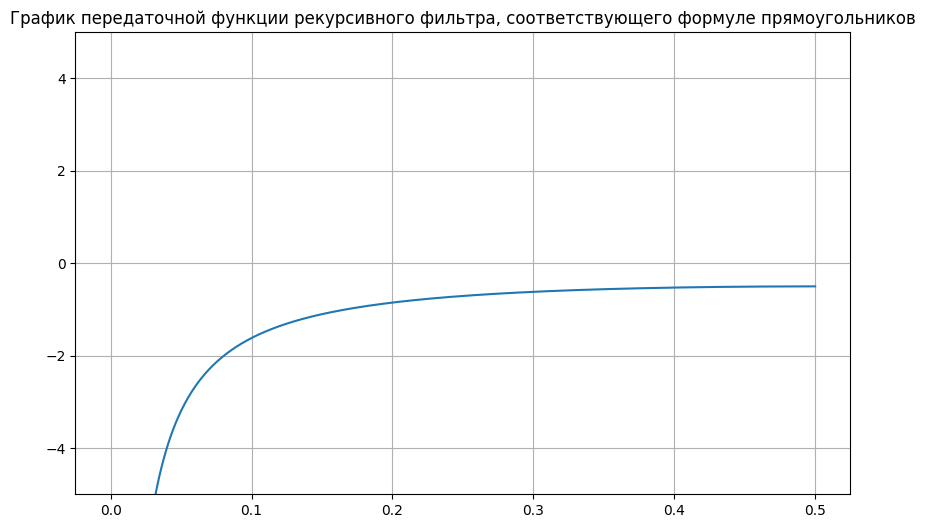

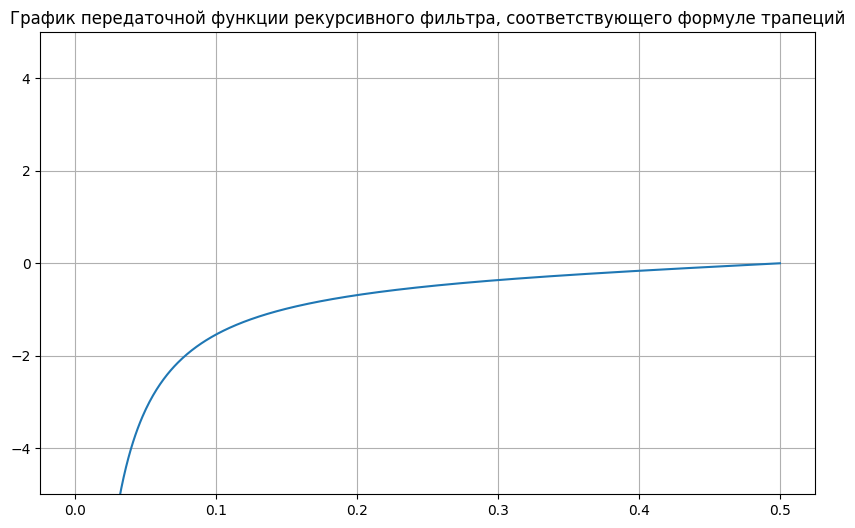

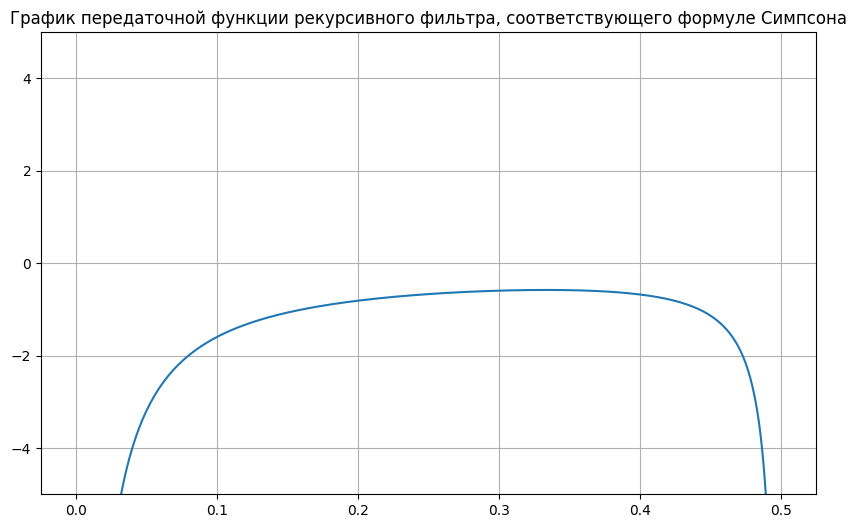

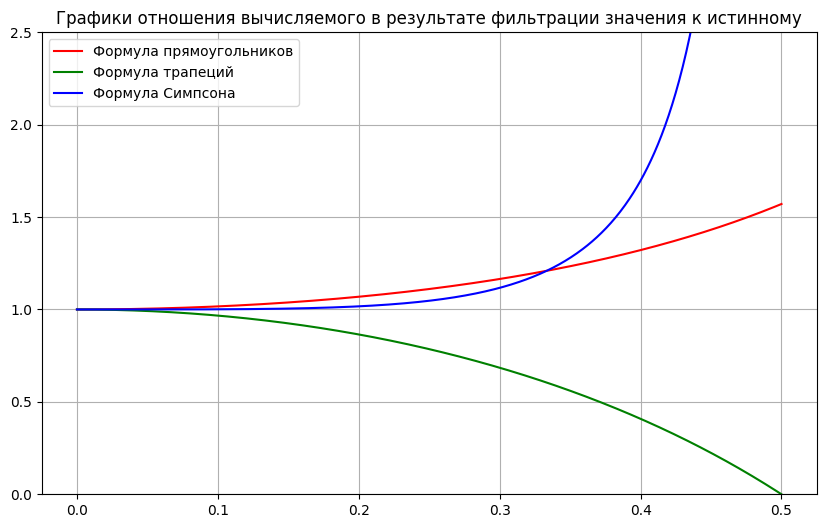

In [2]:
def model_transfer_function_for_Simpson(frequences):
    return ((np.cos(2 * np.pi * frequences) + 2)/ (3j * np.sin(2 * np.pi * frequences))).imag

def model_transfer_function_for_rectangle(frequences):
    return (1 / (np.sin(np.pi * frequences) * 2j)).imag

def model_transfer_function_for_trapezoid(frequences):
   return (np.cos(np.pi * frequences) / (2j * np.sin(frequences * np.pi))).imag

def model_ratio_to_true_for_Simpson(frequences):
    return  2 * np.pi * frequences * (np.cos(2 * np.pi * frequences) + 2) / (3 * np.sin(2 * np.pi * frequences))

def model_ratio_to_true_for_rectangle(frequences):
    return np.pi*frequences / (np.sin(np.pi * frequences))

def model_ratio_to_true_for_trapezoid(frequences):
    return np.cos(np.pi * frequences)*(np.pi*frequences/np.sin(frequences*np.pi))

def  plot_for_transfer_function(frequences, transfer_function, label):
    plt.figure(figsize=(10, 6))
    plt.plot(frequences, transfer_function(frequences))
    plt.grid(True)
    plt.ylim(-5, 5)

    plt.title(label)
    plt.show()
    
def plot_for_ratio_to_true(frequences, ratio_to_true, label, legend, colors):
    plt.figure(figsize=(10, 6))
    for i in range(len(colors)):
        plt.plot(frequences, ratio_to_true[i](frequences), label=legend[i], color=colors[i])
    plt.grid(True)
    plt.ylim(0, 2.5)
    plt.title(label)
    plt.legend()
    plt.show()
    
plot_for_transfer_function(frequences, model_transfer_function_for_rectangle, 'График передаточной функции рекурсивного фильтра, соответствующего формуле прямоугольников')
plot_for_transfer_function(frequences, model_transfer_function_for_trapezoid, 'График передаточной функции рекурсивного фильтра, соответствующего формуле трапеций')
plot_for_transfer_function(frequences, model_transfer_function_for_Simpson, 'График передаточной функции рекурсивного фильтра, соответствующего формуле Симпсона')

plot_for_ratio_to_true(frequences, list([model_ratio_to_true_for_rectangle, model_ratio_to_true_for_trapezoid, model_ratio_to_true_for_Simpson]), "Графики отношения вычисляемого в результате фильтрации значения к истинному", plot_legend, colors)

Если отмасштабировать имеющийся диапазон частот сигнала в промежуток $[0, 0.5] Hz$, а затем посчитать значения передаточной функции для отмасштабированных значений, то:

- Исходя из графиков, можно сказать, что передаточная функция $\tilde{H}(f)$ рекурсивного фильтра, соответствующего формуле прямоугольников, сохраняет точность на низких частотах ($[0.0; 0.2) Hz$), однако на средних ($[0.2; 0.4) Hz$) и высоких частотах ($[0.4; 0.5) Hz$) усиливает значение полученного сигнала. 

- Передаточная функция $\tilde{H}(f)$ рекурсивного фильтра, соответствующего формуле Симпсона, сохраняет точность на большем диапазоне частот, а именно $[0.0; 0.3] Hz$, на больших значениях резко усиливает значение полученного сигнала.

- Передаточная функция $\tilde{H}(f)$ рекурсивного фильтра, соответствующего формуле трапеций, сохраняет точность на малых частотах ($[0.0; 0.1] Hz$), на больших частотах ослабляет значение полученного сигнала, самые большие частоты фильтр не пропускает.

### Задание 2

Формула рекурсивного фильтра для интегрирования "по правилу 3/8":
$$y_{n + 2} = y_{n - 1} + \frac{1}{8}(s_{n + 2} + 3s_{n + 1} + 3s_n + s_{n-1})$$

$s_n = e^{i\omega n}, y_n = H(\omega)e^{i\omega n}$, тогда:

$$
\begin{cases}
y_{n + 2} = H(\omega) e^{i \omega (n - 1)} + \frac{1}{8}(e^{i\omega (n + 2)} + 3e^{i\omega (n + 1)} + 3e^{i\omega n} + e^{i\omega (n - 1)}) \\
y_{n + 2} = H(\omega) e^{i \omega (n + 2)}\\
\end{cases}
$$

$$H(\omega) e^{i \omega (n + 2)} = H(\omega) e^{i \omega (n - 1)} + \frac{1}{8}(e^{i\omega (n + 2)} + 3e^{i\omega (n + 1)} + 3e^{i\omega n} + e^{i\omega (n - 1)})$$
$$H(\omega) e^{2i\omega} = H(\omega)e^{-i\omega} + \frac{1}{8}(e^{2i\omega} + 3e^{i\omega} + 3 + e^{-i\omega})$$
$$H(\omega) (e^{2i\omega} - e^{-i\omega}) = \frac{1}{8}(e^{2i\omega} + 3e^{i\omega} + 3 + e^{-i\omega})$$
$$H(\omega) = \frac{e^{2i\omega} + 3e^{i\omega} + 3 + e^{-i\omega}}{8(e^{2i\omega} - e^{-i\omega})} = \frac{e^{1.5i\omega} + 3e^{0.5i\omega} + 3e^{-0.5i\omega} + e^{-1.5i\omega}}{8(e^{1.5i\omega} - e^{-1.5i\omega})}$$

Если учесть формулу Эйлера, то получится следующий результат:

$$H(\omega) = \frac{\cos(1.5\omega) + 3\cos(0.5\omega)}{8i\sin(1.5\omega)}$$
$$\tilde{H}(f) = \frac{\cos(3\pi f) + 3\cos(\pi f)}{8i\sin(3 \pi f)}$$

Точное значение интеграла от $e^{i\omega t}$ равно $\frac{e^{i\omega t}}{i \omega}$, тогда значение отношения $\gamma = \frac{Вычисленное}{Точное} = \omega\frac{\cos(1.5\omega) + 3\cos(0.5\omega)}{8\sin(1.5\omega)}$, или:

$$\gamma = 2\pi f\frac{\cos(3\pi f) + 3\cos(\pi f)}{8\sin(3 \pi f)}$$

Ниже представлена программа, которая строит графики передаточной функции и график отношения вычисляемого в результате фильтрации значения к истинному.


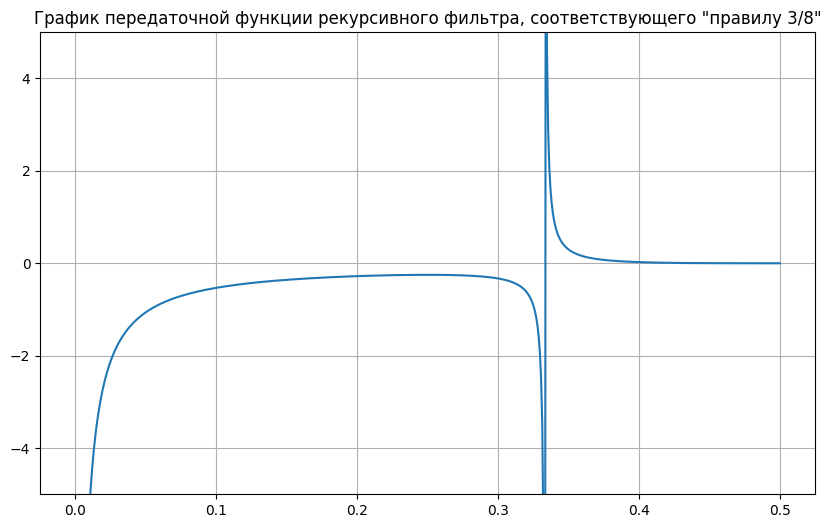

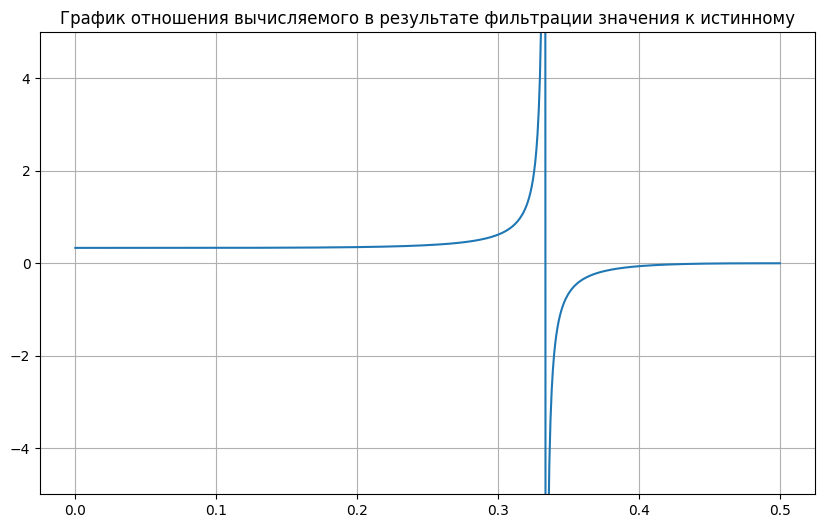

In [3]:
def model_transfer_function_for_rule_3_8(frequences):
    return ((np.cos(3 * np.pi * frequences) + 3 * np.cos(np.pi * frequences))/(8j * np.sin(3 * np.pi * frequences))).imag

def model_ratio_to_true_for_rule_3_8(frequences):
    return 2 * np.pi * frequences * ((np.cos(3 * np.pi * frequences) + 3 * np.cos(np.pi * frequences))/(8 * np.sin(3 * np.pi * frequences)))

plot_for_transfer_function(frequences, model_transfer_function_for_rule_3_8, 'График передаточной функции рекурсивного фильтра, соответствующего "правилу 3/8"')
plot_for_transfer_function(frequences, model_ratio_to_true_for_rule_3_8, "График отношения вычисляемого в результате фильтрации значения к истинному")


Если отмасштабировать имеющийся диапазон частот сигнала в промежуток $[0, 0.5] Hz$, а затем посчитать значения передаточной функции для отмасштабированных значений, то:

- Исходя из графиков, можно сказать, что передаточная функция $\tilde{H}(f)$ рекурсивного фильтра, соответствующего формуле "по правилу 3/8", ослабляет в 3 раза значение сигнала на малых и средних частотах ($[0.0; 0.3] Hz$), затем при значении частоты приблизительно $0.33 Hz$ присутствует точка разрыва. Частоты больше, чем $0.4 Hz$ фильтр не пропускает.

### Задание 3

Были построены графики для передаточных функций, они демонстрируют следующее:

- Формула прямоугольников хорошо справляется с низкими частотами, но на средних и высоких частотах вносит искажения.  
- Формула трапеций, наоборот, эффективно подавляет высокочастотные компоненты, но может быть недостаточно точной на средних частотах.
- Формула Симпсона демонстрирует высокую точность на низких и средних частотах, однако на высоких частотах сигнал усиливается, что может привести к значительным искажениям.
- Формула "по правилу 3/8" ослабляет значение сигнала на малых и средних частотах, а при частоте приблизительно 1/3 присутствует точка разрыва. Высокие частоты фильтр не пропускает.

Таким образом, можно сделать следующий вывод:

- Для низких частот подходит формула прямоугольников, для подавления высокочастотных шумов — формула трапеции, а формула Симпсона эффективна на низких и средних частотах, однако на высоких частотах она усиливает сигнал. Формула “по правилу 3/8” применима ограниченно из-за наличия точки разрыва.

## Выводы

В ходе лабораторной работы был проведен анализ и сравнительное исследование частотных характеристик различных квадратурных формул численного интегрирования, включая формулы прямоугольников, трапеций, Симпсона и правило 3/8. Исследование показало, как выбор метода интегрирования влияет на качество обработки сигналов, особенно в контексте сохранения низкочастотных компонентов и подавления высокочастотного шума.

Анализ частотных характеристик фильтров, основанных на этих квадратурных формулах, показал, что более сложные методы, такие как правило Симпсона, обеспечивают лучшее сглаживание и меньшие искажения. В то же время формула 3/8 имеет ограниченное применение из-за наличия точки разрыва на частоте около 1/3, что делает её не столь универсальной.

Построение графиков передаточных функций и отношения вычисленного значения к истинному при фильтрации позволило более глубоко проанализировать поведение фильтров в разных частотных диапазонах и их эффективность в подавлении шума.

Работа продемонстрировала важность правильного выбора квадратурной формулы в зависимости от типа обрабатываемых сигналов. Результаты анализа подчеркивают, что правильный выбор метода интегрирования может существенно повлиять на качество обработки данных и эффективность фильтрации, что особенно важно в задачах цифровой обработки сигналов.